In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# image = cv2.imread('assignment/Easy/flower.jpg')
image = cv2.imread('assignment/Medium/panguan.jpg')
mask = np.zeros(image.shape[:2], np.uint8)

# Define the foreground and background models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle around the object
rectangle = (10, 10, image.shape[1]-10, image.shape[0]-10)

# Apply the GrabCut algorithm
cv2.grabCut(image, mask, rectangle, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Multiply to get the foreground
result = image * mask2[:, :, np.newaxis]


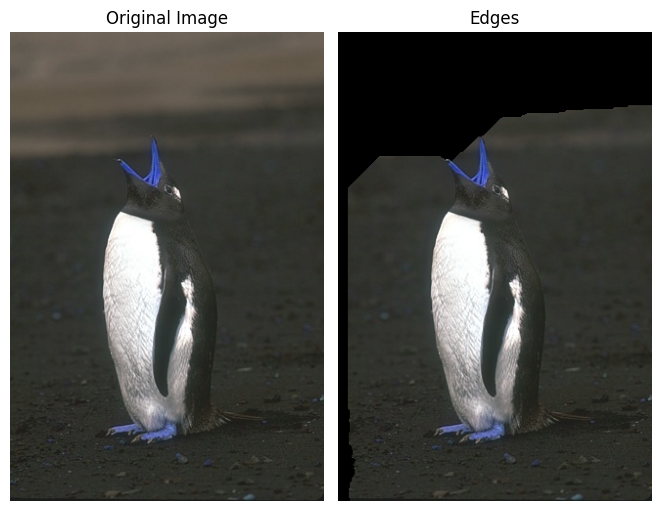

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Global Thresholding')
# plt.imshow(global_thresh, cmap='gray')
# plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.tight_layout()

# Method: Using DeepLabV3 for Semantic Segmentation

In [9]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image

In [10]:
# Load the pre-trained DeepLabV3 model
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()

Using cache found in /home/parsa/.cache/torch/hub/pytorch_vision_v0.10.0


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [15]:
# Define the transform to preprocess the image
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((520, 520)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [117]:
# Load the image

files = ['assignment/Medium/panguan.jpg', 
    'assignment/Medium/star.jpg', 
    'assignment/Medium/horse.jpg', 
    'assignment/Medium/man.jpg', 
    'assignment/Medium/spider.jpg', 
    'assignment/Hard/223004.jpg', 
    'assignment/Hard/288024.jpg', 
    'assignment/Hard/393035.jpg', 
    'assignment/Hard/168084.jpg', 
    'assignment/Hard/87015.jpg', 
    'assignment/Easy/car.jpg', 
    'assignment/Easy/horse.jpg', 
    'assignment/Easy/church.jpg', 
    'assignment/Easy/pyrmid.jpg', 
    'assignment/Easy/flower.jpg'
    ]

images = []
for file in files:
    image = cv2.imread(file)
    images.append(image)


In [119]:
def somefunction(image):
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
    height, width = image.shape[:2]
    # Perform inference
    with torch.no_grad():
        output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)

    # Print unique classes in predictions
    unique_classes = np.unique(output_predictions.numpy())
    print(f"Unique classes in predictions: {unique_classes}")

    # for unique_class in unique_classes:


    # Create a mask for the detected class (update based on your findings)
    target_class_index = unique_classes[-1]  # Change this index if needed
    mask = (output_predictions == target_class_index).byte()

    # Resize the mask to match the original image dimensions
    mask_resized = cv2.resize(mask.numpy(), (width, height), interpolation=cv2.INTER_NEAREST)

    # Check the shapes
    # print(f"Original image shape: {image.shape}")
    # print(f"Resized mask shape: {mask_resized.shape}")

    # Create a 3-channel mask using np.stack
    mask_3channel = np.stack([mask_resized]*3, axis=-1)

    # Use the mask to extract the foreground
    foreground = image * mask_3channel

    return foreground

In [120]:
forgrounds = []
for image in images:
    forgrounds.append(somefunction(image))

Unique classes in predictions: [0 3]
Unique classes in predictions: [ 0 15 20]
Unique classes in predictions: [ 0 13]
Unique classes in predictions: [ 0 15]
Unique classes in predictions: [0 3]
Unique classes in predictions: [ 0 15]
Unique classes in predictions: [ 0 15]
Unique classes in predictions: [0 4]
Unique classes in predictions: [ 0 17]
Unique classes in predictions: [0]
Unique classes in predictions: [0 7]
Unique classes in predictions: [ 0 13]
Unique classes in predictions: [0]
Unique classes in predictions: [0]
Unique classes in predictions: [ 0 16]


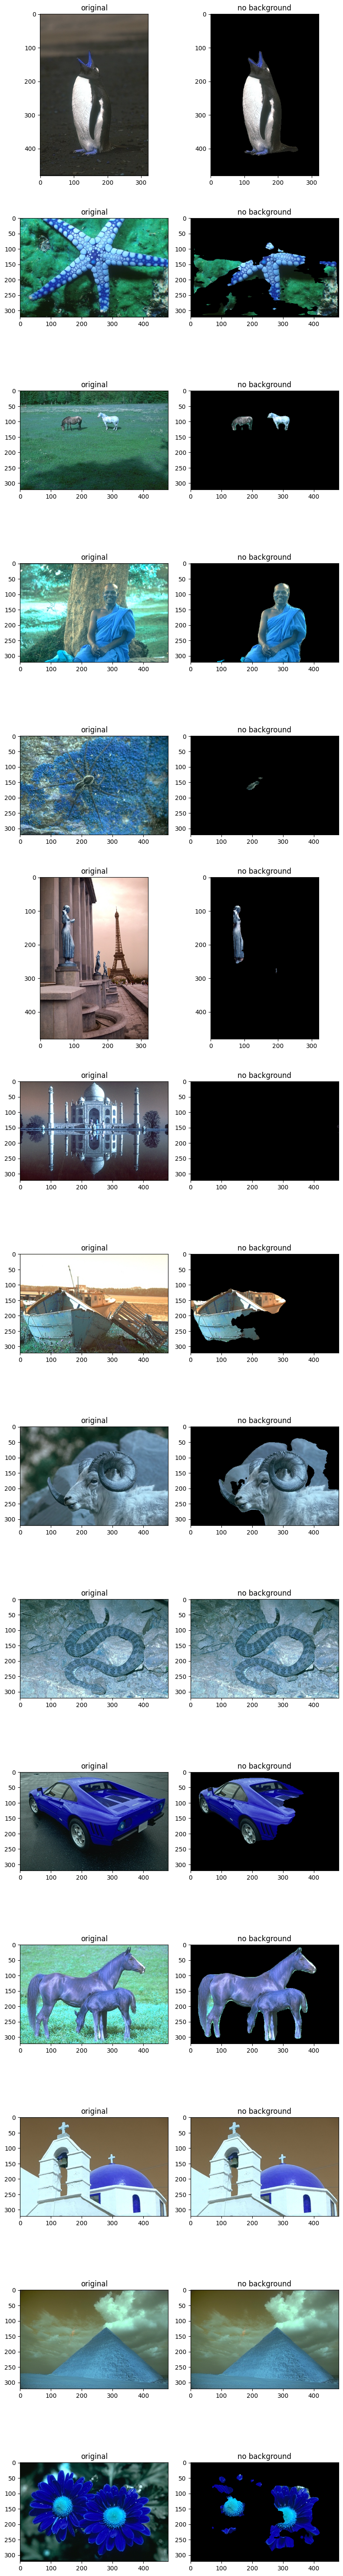

In [127]:
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 3, 1)
# plt.title('Original Image')
# plt.imshow(image)
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Global Thresholding')
# plt.imshow(global_thresh, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Edges')
# plt.imshow(foreground)
# plt.axis('off')


figure, axis = plt.subplots(nrows=len(images), ncols=2, figsize=(8, 60))
for idx, image in enumerate(images):
    axis[idx, 0].imshow(image)
    axis[idx, 0].set_title("original")
    

    axis[idx, 1].imshow(forgrounds[idx])
    axis[idx, 1].set_title("no background")
    
figure.tight_layout()